In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### read in model performance csv

In [3]:
path_csv = '../results_latest/results_all.csv'
df_losses = pd.read_csv(path_csv).sort_values(by='name_model')

target_list = [
    'alpha_tubulin', 'beta_actin', 'desmoplakin', 'dic_lamin_b1',
    'dic_membrane', 'dna', 'fibrillarin', 'lamin_b1',
    'membrane', 'myosin_iib', 'sec61_beta', 'tom20',
    'zo1',
]
mask = df_losses['name_model'].isin(target_list)
df_losses = df_losses[mask]
print('got results for {:d} models'.format(df_losses.shape[0]))

got results for 13 models


### make bar graphs

['bf-alpha tubulin', 'bf-beta actin', 'bf-desmoplakin', 'dic-lamin b1', 'dic-cellmask', 'bf-hoechst', 'bf-fibrillarin', 'bf-lamin b1', 'bf-cellmask', 'bf-myosin iib', 'bf-sec61 beta', 'bf-tom20', 'bf-zo1']


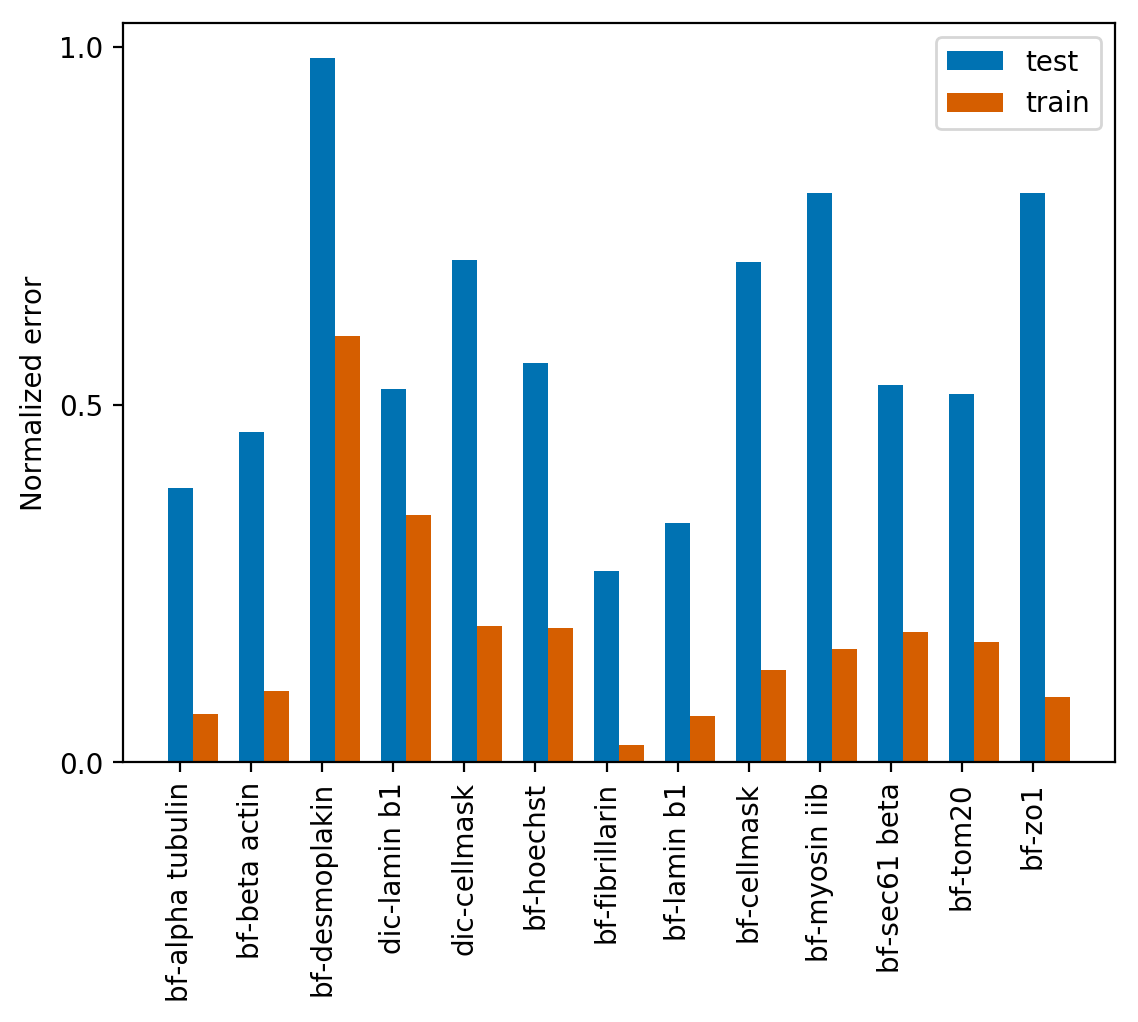

In [21]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.dpi = 200
width = 0.35
legend_loc = (0.32, 0.8)

def label_fixer(x):
    label = x.replace('_', ' ')
    label = label.replace('dna', 'hoechst')
    label = label.replace('membrane', 'cellmask')
    if label.startswith('dic'):
        return 'dic-' + label.replace('dic ', '')
    return 'bf-' + label

x_labels = [label_fixer(i) for i in df_losses['name_model']]
print(x_labels)

ind = np.arange(len(x_labels))
ax.bar(ind, df_losses['l2_norm_test'], width=width, color='#0072b2')
ax.bar(ind+width, df_losses['l2_norm_train'], width=width, color='#d55e00')

ax.set_xticks(ind)
ax.set_xticklabels(x_labels, rotation='vertical')
ax.set_yticks([0.0, 0.5, 1.0])
plt.ylabel('Normalized error')
ax.legend(['test', 'train'])

In [23]:
fig.savefig('../fnet_paper/errors.pdf', bbox_inches='tight', pad_inches=0)